# Analysis and visualization data of Nobel Prize laureates using pandas and matplotlib.
##### Data was take from here: https://www.kaggle.com/code/romanppp1/working-with-nobel-prize-data

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
df = pd.read_csv('nobel_latest.csv')

### Number of Nobel Prize laureates by gender

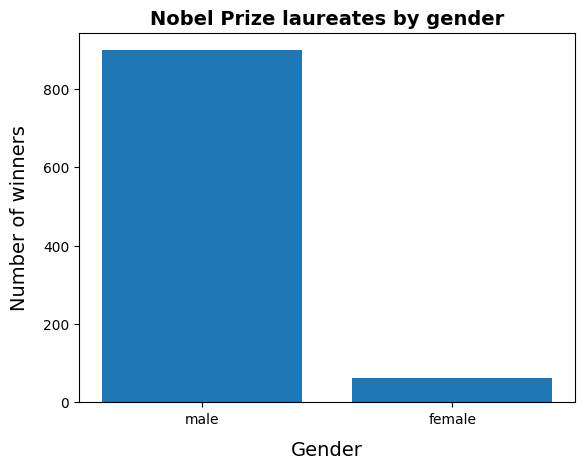

In [9]:
winners_by_gender = df['Gender'].value_counts()

plt.title('Nobel Prize laureates by gender', fontsize=14, fontweight='bold')
plt.xlabel('Gender', fontsize=14, labelpad=10)
plt.ylabel('Number of winners', fontsize=14, labelpad=10)

winners_by_gender_plot = plt.bar(winners_by_gender.index[:-1], winners_by_gender.values[:-1])

### Top 20 countries by Nobel Prize laureates

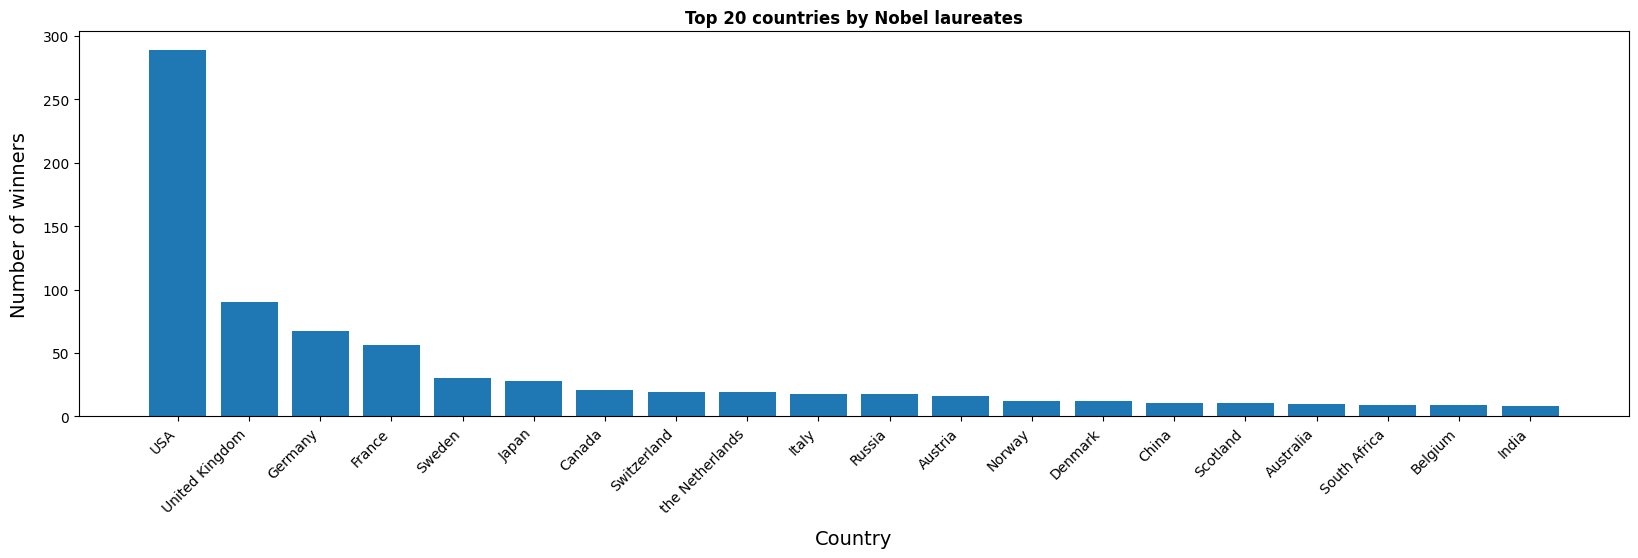

In [10]:
country_counts = df['Birth_Country'].value_counts()
top_20_winners_by_country = country_counts.index[:20]
top_20_number_of_laureates = country_counts.values[:20]

plt.figure(figsize=(20, 5))
plt.title('Top 20 countries by Nobel laureates', fontweight='bold')
plt.xlabel('Country', fontsize=14, labelpad=10)
plt.ylabel('Number of winners', fontsize=14, labelpad=10)
plt.xticks(rotation=45, ha='right')

top_20_winners_by_country_plot = plt.bar(top_20_winners_by_country, top_20_number_of_laureates, align='center')

### Top 1 country by Nobel Prize laureates
#### USA has the most Nobel laureates. The most awarded in one year was 8, these were 1972, 1990 and 2001.
##### 1972:
- The United States and Soviet Union sign the Anti-Ballistic Missile (ABM) Treaty
- NASA’s Space Shuttle Program is officially launched
##### 1990:
- NASA’s STS-31 mission deploys the Hubble Space Telescope during April.
- The joint ESA / NASA space probe "Ulysses" was launched.
##### 2001:
- George W. Bush became a president.
- September 11 attacks by Al-Qaeda, which killed 2,977 people and instigated the global war on terror.

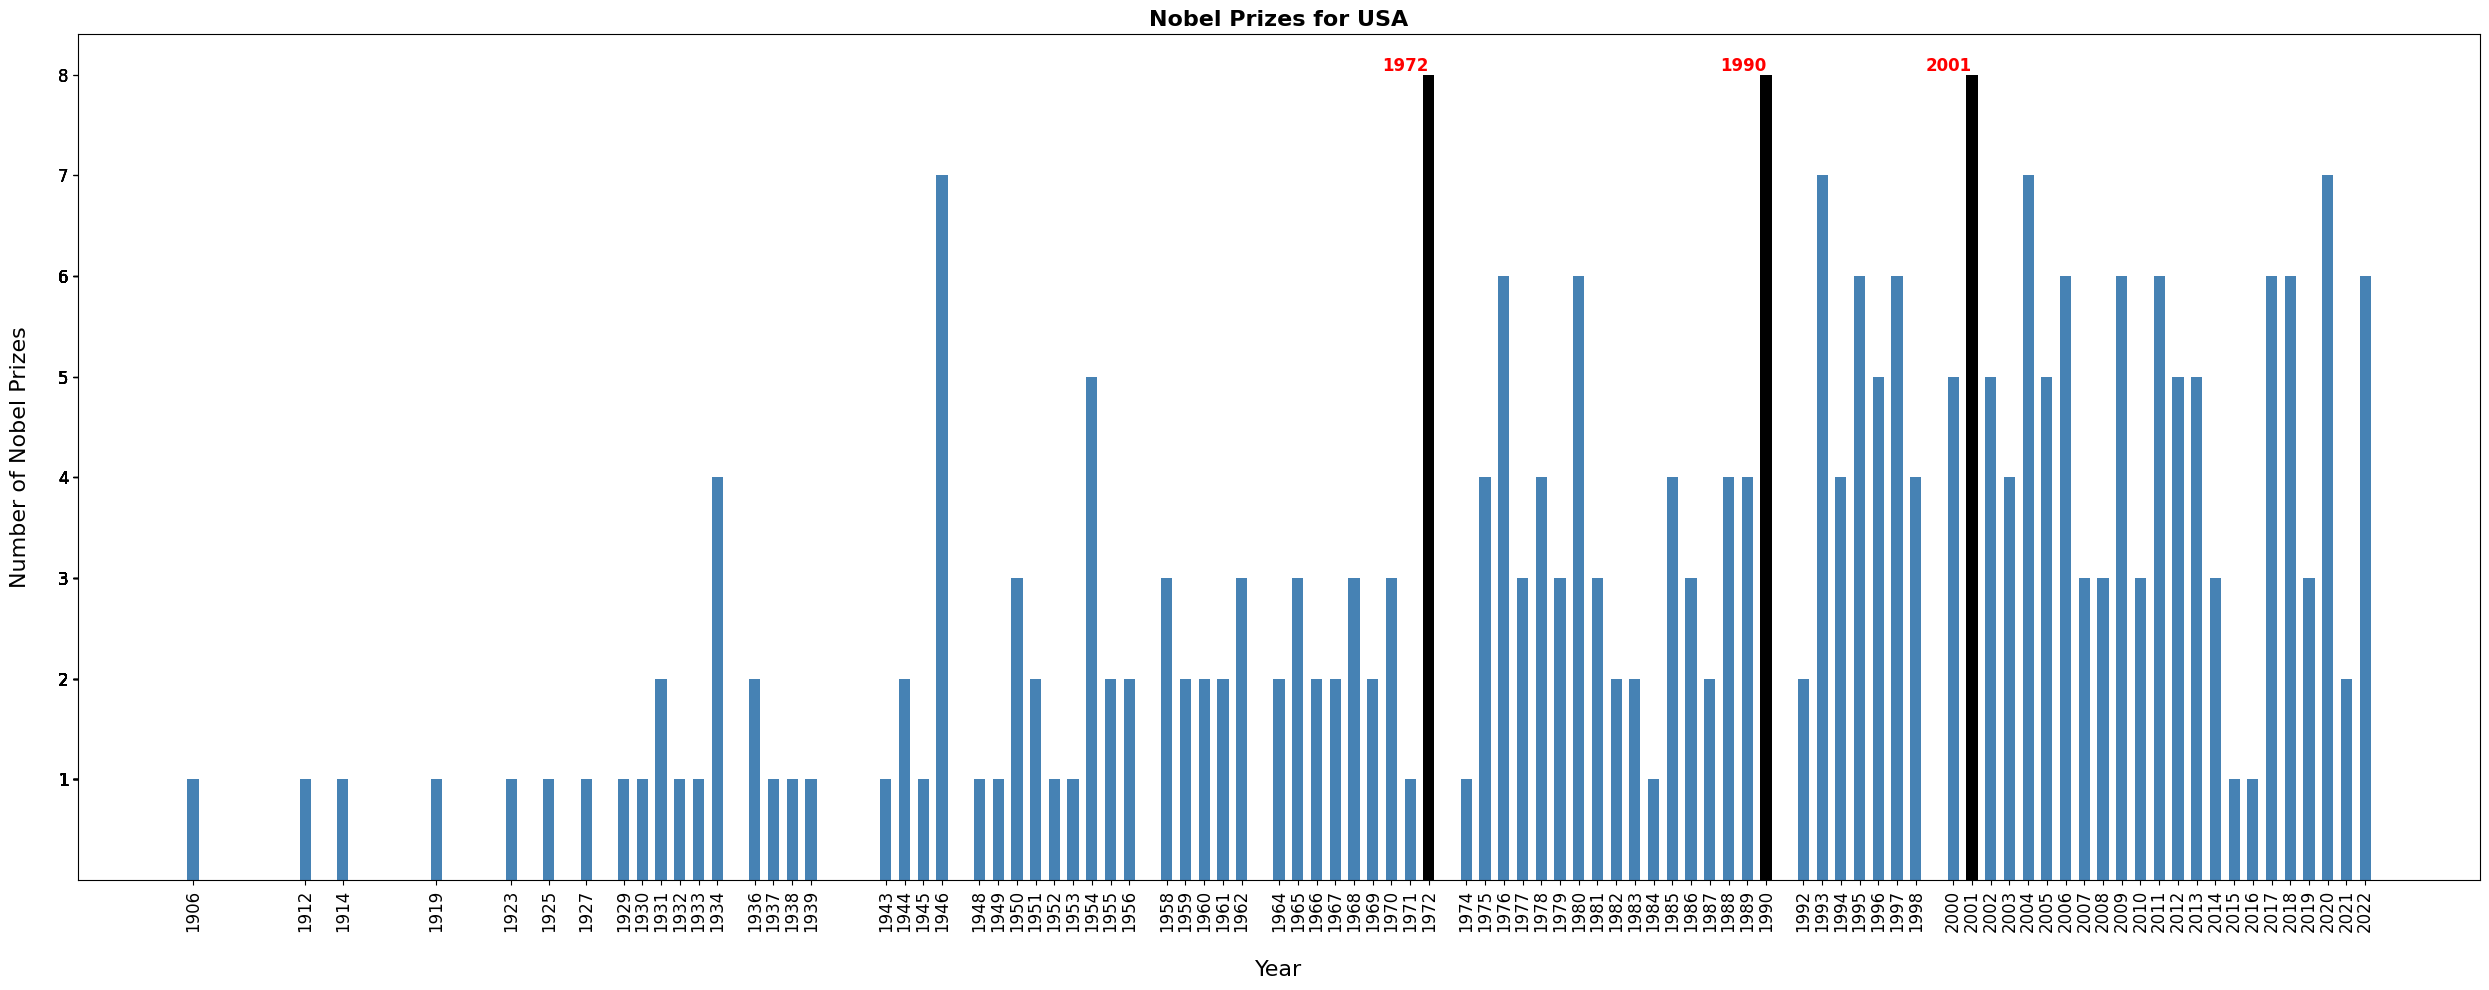

In [11]:
top_1_country = country_counts.head(1).index[0]
filtered_data = df[df['Birth_Country'] == top_1_country]

grouped_data = filtered_data.groupby('Year').size()

years_with_prizes = grouped_data.index
number_of_laureates = grouped_data.values

max_laureates = max(number_of_laureates)

colors = ['steelblue' if val != max_laureates else 'black' for val in number_of_laureates]

plt.figure(figsize=(25, 10))
plt.xticks(years_with_prizes, rotation=90, ha='center',fontsize=12)
plt.yticks(number_of_laureates, fontsize=12)

plt.bar(years_with_prizes, number_of_laureates, width=0.6, align='center', color=colors)

plt.xlabel('Year', fontsize=16, labelpad=20)
plt.ylabel('Number of Nobel Prizes', fontsize=16, labelpad=20)
plt.title(f'Nobel Prizes for {top_1_country}', fontsize=16, fontweight='bold')
plt.tight_layout()

for i, val in enumerate(number_of_laureates):
    if val == max_laureates:
        plt.text(years_with_prizes[i], val, str(years_with_prizes[i]), ha='right', va='bottom', fontsize=12, color='red', fontweight='bold')

plt.show()

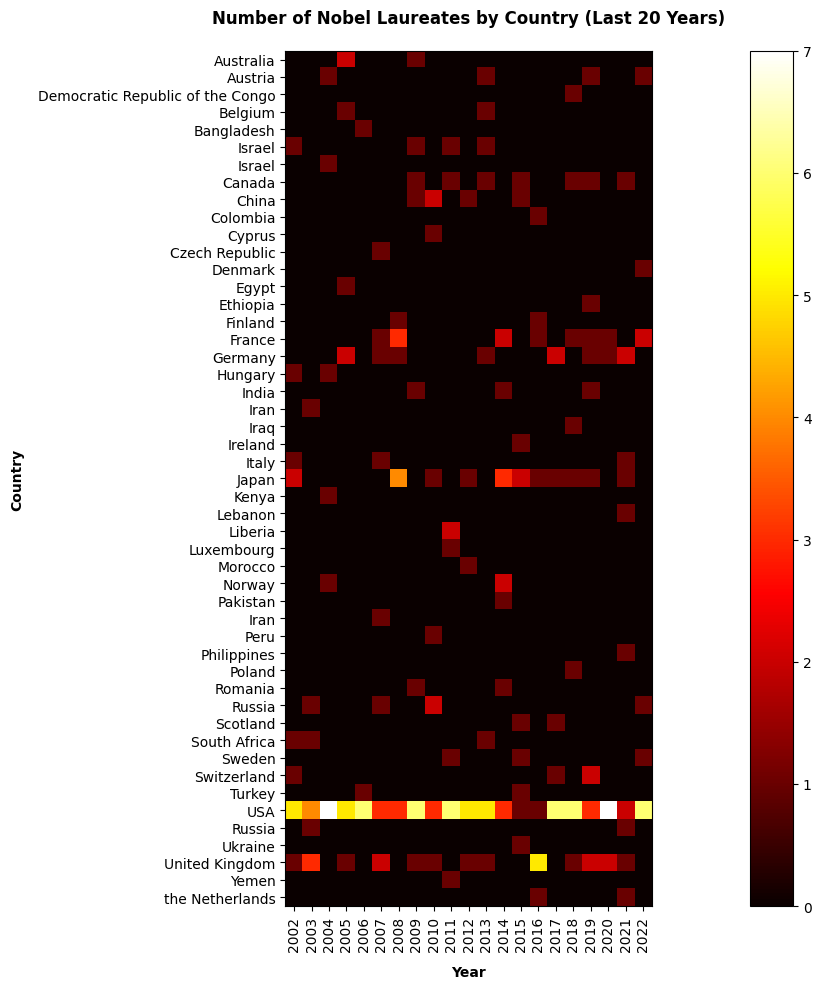

In [14]:
last_10_years = df[df.Year >= df.Year.max() - 20]

heatmap_data = last_10_years.pivot_table(index='Birth_Country', columns='Year', aggfunc='size', fill_value=0)

for county_name in heatmap_data.index:
    if '(' in county_name:
        heatmap_data.rename({county_name: county_name.split('(')[1][:-1].replace('now', '').strip()}, inplace=True, axis='index')

countries = heatmap_data.index
years = heatmap_data.columns

plt.figure(figsize=(20, 10))
plt.imshow(heatmap_data, cmap='hot', interpolation='nearest')

plt.yticks(np.arange(len(countries)), countries)
plt.ylabel('Country', labelpad=10, fontweight='bold')

plt.xticks(np.arange(len(years)), years, rotation='vertical')
plt.xlabel('Year', labelpad=10, fontweight='bold')

plt.title('Number of Nobel Laureates by Country (Last 20 Years)', fontweight='bold', pad=20)

plt.colorbar()

plt.tight_layout()

plt.show()